Importing libraries


In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df=pd.read_csv("/content/gdrive/MyDrive/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Data visualisation

In [4]:
print(f'The description of dataset:\n{df.describe(include="all").T}')

The description of dataset:
           count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0.762494   
V12     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

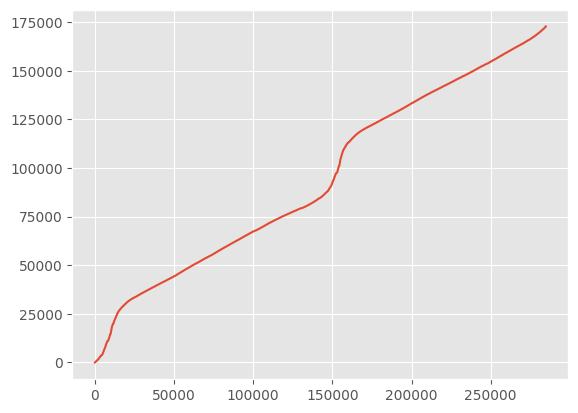

In [6]:
df['Time'].plot()
plt.show()

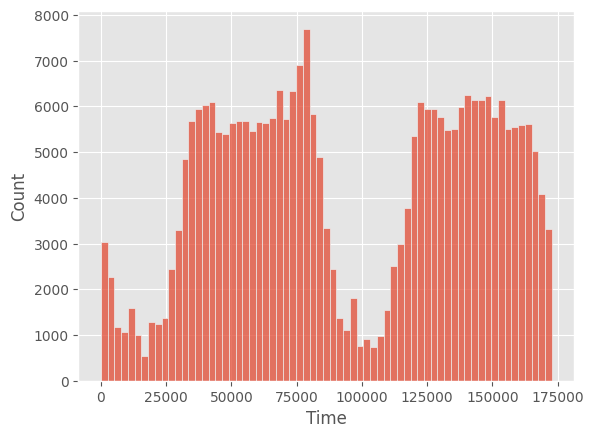

In [7]:
ax = sns.histplot(data=df, x='Time')
plt.show()

Splitting of data

In [8]:
x=df.drop(columns='Class',axis=1)
y=df['Class']

In [11]:
ru=RandomUnderSampler(random_state=0)
sampled_x,sampled_y=ru.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(sampled_x,sampled_y,test_size=0.3,random_state=45)
print(f"the shape of x_train is : {x_train.shape}")
print(f'the shape of x_test is : {x_test.shape}')
print(f'the shape of y_tain is : {y_train.shape}')
print(f'the shape of y_test is {y_test.shape}')

the shape of x_train is : (688, 30)
the shape of x_test is : (296, 30)
the shape of y_tain is : (688,)
the shape of y_test is (296,)


Random forest classifier

In [12]:
rf=RandomForestClassifier()
model1=rf.fit(x_train,y_train)
y_pred=model1.predict(x_test)


print(f'classification report :{classification_report(y_test,y_pred)}')
print('*************************************')
print(f'confusion matrix :{confusion_matrix(y_test,y_pred)}')
print('*************************************')
print(f'accuracy score :{accuracy_score(y_test,y_pred)}')

classification report :              precision    recall  f1-score   support

           0       0.91      0.99      0.95       143
           1       0.99      0.91      0.95       153

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

*************************************
confusion matrix :[[142   1]
 [ 14 139]]
*************************************
accuracy score :0.9493243243243243


Logistic Regression

In [13]:
lr=LogisticRegression(max_iter=1000)
model2=lr.fit(x_train,y_train)
y_pred2=model2.predict(x_test)


print(f'classification report :{classification_report(y_test,y_pred2)}')
print('*************************************')
print(f'confusion matrix :{confusion_matrix(y_test,y_pred2)}')
print('*************************************')
print(f'accuracy score :{accuracy_score(y_test,y_pred2)}')

classification report :              precision    recall  f1-score   support

           0       0.91      0.98      0.94       143
           1       0.98      0.91      0.94       153

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.95      0.94      0.94       296

*************************************
confusion matrix :[[140   3]
 [ 14 139]]
*************************************
accuracy score :0.9425675675675675
